# Interacting Hosts with Microbe Exchange Notebook

In [1]:
import os
os.chdir("C:/Users/mcjca/Documents/Microbiome/Final Code")

In [2]:
from Setup import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rcParams['figure.figsize'] = [5,5]

## Interaction Network

The code below generates an Erdos-Renyi graph $G(n,p)$

In [3]:
n_hosts = 10
p_hosts = 0.5
lam = 0.1*rand.choice(2,size=n_hosts*n_hosts,p=[1-p_hosts,p_hosts]).reshape((n_hosts,n_hosts))
lam = np.tri(n_hosts,k=-1)*lam
lam = lam + lam.T

G = nx.from_numpy_array(lam)

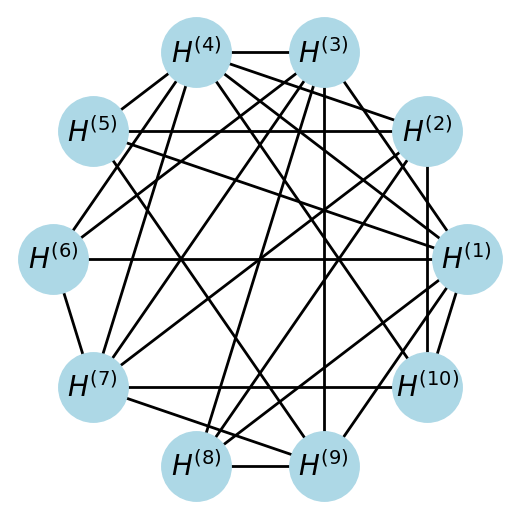

In [4]:
pos = nx.spring_layout(G)
labels = {i-1:f'$H^{{({i})}}$' for i in range(1,n_hosts+1)}
nx.draw(G,pos=nx.circular_layout(G),with_labels=True,labels=labels,node_size=2500,node_color="lightblue",font_size=20,width=2)
plt.show()

In the paper, we chose the following network using the above process and held it fixed throughout our experiments.

In [5]:
lam_og = 10*np.load("lam.npy",allow_pickle=True)
G = nx.from_numpy_array(lam_og)

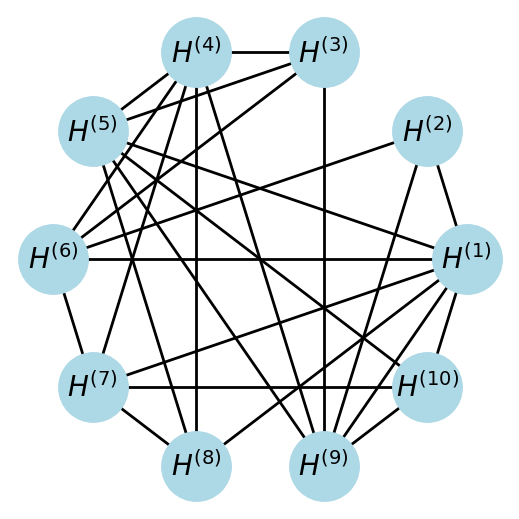

In [6]:
pos = nx.spring_layout(G)
labels = {i-1:f'$H^{{({i})}}$' for i in range(1,n_hosts+1)}
nx.draw(G,pos=nx.circular_layout(G),with_labels=True,labels=labels,node_size=2500,node_color="lightblue",font_size=20,width=2)
plt.show()
#plt.savefig("Figures/Interaction Network.png",bbox_inches='tight')

## Local Dynamics

The toy model local dynamics from the paper can be represented with the following function.

In [7]:
def fun(t,y,a,b,c,d,e,f):
    return [-(y[0]*y[0]-a)*(y[0]-b)*(y[0]-c),-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)]

We can visualize the basins of attraction for this function. To get the attractors and basins, we used the Julia code available in the code repository.

In [8]:
a_df = pd.read_csv("attractors_test.csv")
a_df['ind'] = a_df['ind']-1
a_df.set_index('ind',inplace=True)
a_df.sort_index(inplace=True)

n = len(a_df)

a_arr = a_df.to_numpy()
a_arr_x1 = a_arr[:,0]
a_arr_x2 = a_arr[:,1]

b_arr = np.genfromtxt("basins_test.csv",delimiter=',',dtype=np.int64)

crits = a_arr
basins = b_arr
num_basins = len(np.unique(basins))
basins_range = [[0,14],[0,14]]

basins2 = np.full_like(basins,5)

basins2[np.where(basins==1)] = 1
basins2[np.where(basins==2)] = 1
basins2[np.where(basins==3)] = 2
basins2[np.where(basins==4)] = 1
basins2[np.where(basins==5)] = 1
basins2[np.where(basins==6)] = 2
basins2[np.where(basins==7)] = 3
basins2[np.where(basins==8)] = 3
basins2[np.where(basins==9)] = 4

#np.save("basins.npy",basins2)
#np.save("crits.npy",crits[[4,5,7,8]])

In [9]:
# Load the basins object created in the previous step
basins = np.load("basins.npy")

In [10]:
basins2 = np.rot90(basins)

resolution = len(basins2)

cmap = ListedColormap([
    [0.65,0.65,1],
    [0.75,0.75,1],
    [0.85,0.85,1],
    [0.95,0.95,1]
])

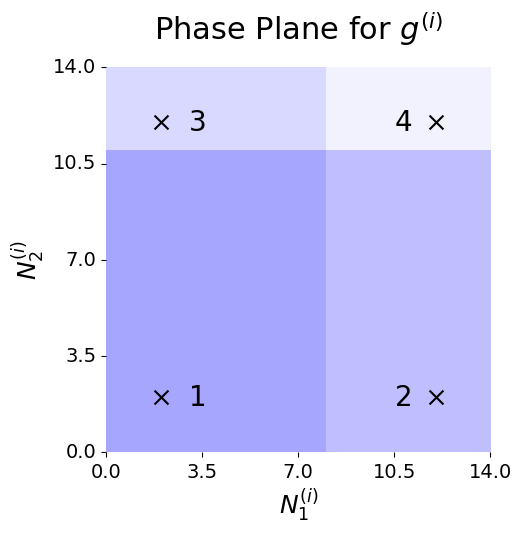

In [11]:
hos = 1
vos = 0.3
fig,ax = plt.subplots(figsize = (5,5))

sns.heatmap(basins2-1,cmap=cmap,cbar=False,square=True,ax=ax)
ax.set_xticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_xticklabels([f'{x:.1f}' for x in np.linspace(0,14,5)],fontsize=14)
ax.set_yticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_yticklabels([f'{x:.1f}' for x in np.linspace(14,0,5)],fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.scatter(np.array([2,2,12,12])*(resolution-1)/14,(14-np.array([2,12,2,12]))*(resolution-1)/14,marker='x',c='black',s=100)
ax.set_title(f"Phase Plane for $g^{{(i)}}$",fontsize=22,pad=20)
ax.set_xlabel(f"$N_1^{{(i)}}$",fontsize=18)
ax.set_ylabel(f"$N_2^{{(i)}}$",fontsize=18)
ax.annotate(r'$1$',(2*(resolution-1)/14,(14-2)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$2$',(12*(resolution-1)/14,(14-2)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$3$',(2*(resolution-1)/14,(14-12)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$4$',(12*(resolution-1)/14,(14-12)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)

plt.show()
#plt.savefig("Figures/One Hosts Basins.png",bbox_inches='tight')

We can visualize the effect of different values of $\gamma$ on exchange.

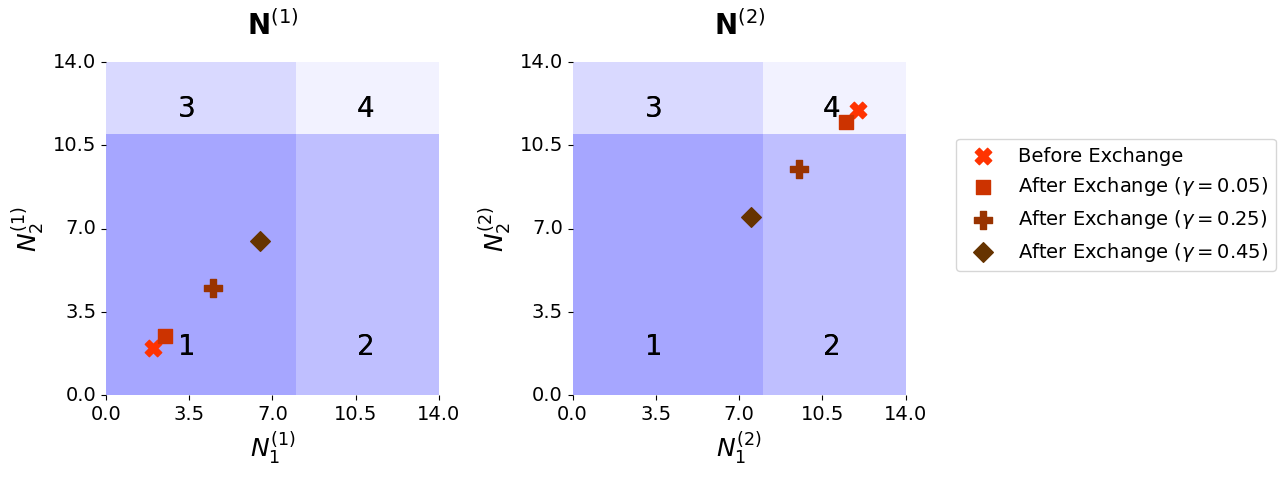

In [12]:
hos = 1
vos = 0.3
fig,axs = plt.subplots(1,2,figsize = (10,5))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.35)

gams = [0.05,0.25,0.45]
xs_dot1 = [2]
xs_dot2 = [12]
ys_dot1 = [2]
ys_dot2 = [12]
for j in range(3):
    xs_dot1.append(2+10*gams[j])
    xs_dot2.append(12-10*gams[j])
    ys_dot1.append(2+10*gams[j])
    ys_dot2.append(12-10*gams[j])
    
xs_dot = [xs_dot1,xs_dot2]
ys_dot = [ys_dot1,ys_dot2]

for i in range(2):
    ax = axs.flatten()[i]
    sns.heatmap(basins2,cmap=cmap,cbar=False,square=True,ax=ax)
    ax.set_xticks(range(0,resolution,int(np.round((resolution-1)/4))))
    ax.set_xticklabels([f'{x:.1f}' for x in np.linspace(0,14,5)],fontsize=14)
    ax.set_yticks(range(0,resolution,int(np.round((resolution-1)/4))))
    ax.set_yticklabels([f'{x:.1f}' for x in np.linspace(14,0,5)],fontsize=14)
    ax.tick_params(axis='x', rotation=0)
    #ax.scatter(np.array([2,2,12,12])*(resolution-1)/14,(14-np.array([2,12,2,12]))*(resolution-1)/14,marker='x',c='black',s=100)
    ax.annotate(r'$1$',(2*(resolution-1)/14,(14-2)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$2$',(12*(resolution-1)/14,(14-2)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$3$',(2*(resolution-1)/14,(14-12)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$4$',(12*(resolution-1)/14,(14-12)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)
    
    sp1 = ax.scatter(np.array(xs_dot[i][0])*(resolution-1)/14,(14-np.array(ys_dot[i][0]))*(resolution-1)/14,marker='X',c=[[1,0.2,0]],s=140)
    sp2 = ax.scatter(np.array(xs_dot[i][1])*(resolution-1)/14,(14-np.array(ys_dot[i][1]))*(resolution-1)/14,marker='s',c=[[0.8,0.2,0.]],s=100)
    sp3 = ax.scatter(np.array(xs_dot[i][2])*(resolution-1)/14,(14-np.array(ys_dot[i][2]))*(resolution-1)/14,marker='P',c=[[0.6,0.2,0.]],s=170)
    sp4 = ax.scatter(np.array(xs_dot[i][3])*(resolution-1)/14,(14-np.array(ys_dot[i][3]))*(resolution-1)/14,marker='D',c=[[0.4,0.2,0.]],s=100)
    
    ax.set_xlabel(f"$N_1^{{({i+1})}}$",fontsize=18)
    ax.set_ylabel(f"$N_2^{{({i+1})}}$",fontsize=18)
    ax.set_title(f"$\mathbf{{N}}^{{({i+1})}}$",fontsize=20,pad=20)
    #ax.scatter(np.array([2,2,12,12])*(resolution-1)/14,(14-np.array([2,12,2,12]))*(resolution-1)/14,marker='x',c='black',s=100)
    ax.annotate(r'$1$',(2*(resolution-1)/14,(14-2)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$2$',(12*(resolution-1)/14,(14-2)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$3$',(2*(resolution-1)/14,(14-12)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)
    ax.annotate(r'$4$',(12*(resolution-1)/14,(14-12)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)

fig.legend([sp1,sp2,sp3,sp4],[f'Before Exchange',f'After Exchange ($\gamma={gams[0]}$)',f'After Exchange ($\gamma={gams[1]}$)',f'After Exchange ($\gamma={gams[2]}$)'],
           bbox_to_anchor=(1.28, 0.7),fontsize=14)
plt.show()
#plt.savefig("Figures/Two Hosts Exchanges.png",bbox_inches='tight')

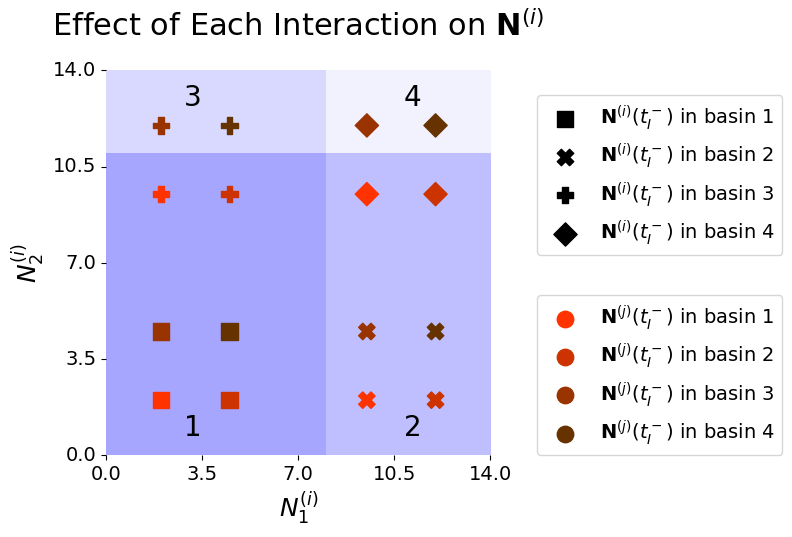

In [13]:
hos = 0.8
vos = 0.3
fig,ax = plt.subplots(figsize = (5,5))
ax.set_facecolor('white')

gam = 0.25
atts = np.array([[2,2],[12,2],[2,12],[12,12]])

a1 = (atts[0]*(1-gam)+gam*atts).T
a2 = (atts[1]*(1-gam)+gam*atts).T
a3 = (atts[2]*(1-gam)+gam*atts).T
a4 = (atts[3]*(1-gam)+gam*atts).T

sns.heatmap(basins2,cmap=cmap,cbar=False,square=True,ax=ax)
ax.set_xticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_xticklabels([f'{x:.1f}' for x in np.linspace(0,14,5)],fontsize=14)
ax.set_yticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_yticklabels([f'{x:.1f}' for x in np.linspace(14,0,5)],fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.set_title(f"Effect of Each Interaction on $\mathbf{{N}}^{{(i)}}$",fontsize=22,pad=25)
ax.set_xlabel(f"$N_1^{{(i)}}$",fontsize=18)
ax.set_ylabel(f"$N_2^{{(i)}}$",fontsize=18)
ax.annotate(r'$1$',(2*(resolution-1)/14,(14-2)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos+1-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$2$',(12*(resolution-1)/14,(14-2)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos+1-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$3$',(2*(resolution-1)/14,(14-12)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-1-(12))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$4$',(12*(resolution-1)/14,(14-12)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-1-(12))*(resolution-1)/14),fontsize=20)

ax.scatter(a1[0]*(resolution-1)/14,(14-a1[1])*(resolution-1)/14,marker='s',c=[[1,0.2,0],[0.8,0.2,0],[0.6,0.2,0],[0.4,0.2,0]],s=140)
ax.scatter(a2[0]*(resolution-1)/14,(14-a2[1])*(resolution-1)/14,marker='X',c=[[1,0.2,0],[0.8,0.2,0],[0.6,0.2,0],[0.4,0.2,0]],s=140)
ax.scatter(a3[0]*(resolution-1)/14,(14-a3[1])*(resolution-1)/14,marker='P',c=[[1,0.2,0],[0.8,0.2,0],[0.6,0.2,0],[0.4,0.2,0]],s=140)
ax.scatter(a4[0]*(resolution-1)/14,(14-a4[1])*(resolution-1)/14,marker='D',c=[[1,0.2,0],[0.8,0.2,0],[0.6,0.2,0],[0.4,0.2,0]],s=140)

#ax.scatter(np.array([2,2,12,12])*(resolution-1)/14,(14-np.array([2,12,2,12]))*(resolution-1)/14,marker='x',c='black',s=250)

sh1 = ax.scatter(-100,-100,marker='s',c='black',s=140)
sh2 = ax.scatter(-100,-100,marker='X',c='black',s=140)
sh3 = ax.scatter(-100,-100,marker='P',c='black',s=140)
sh4 = ax.scatter(-100,-100,marker='D',c='black',s=140)

col1 = ax.scatter(-100,-100,marker='o',c=[[1,0.2,0]],s=140)
col2 = ax.scatter(-100,-100,marker='o',c=[[0.8,0.2,0]],s=140)
col3 = ax.scatter(-100,-100,marker='o',c=[[0.6,0.2,0]],s=140)
col4 = ax.scatter(-100,-100,marker='o',c=[[0.4,0.2,0]],s=140)

fig.legend([sh1,sh2,sh3,sh4],[f'$\mathbf{{N}}^{{(i)}}(t_I^-)$ in basin 1',f'$\mathbf{{N}}^{{(i)}}(t_I^-)$ in basin 2',
                              f'$\mathbf{{N}}^{{(i)}}(t_I^-)$ in basin 3',f'$\mathbf{{N}}^{{(i)}}(t_I^-)$ in basin 4'],
           bbox_to_anchor=(1.5, 0.85),fontsize=14,facecolor='white')

fig.legend([col1,col2,col3,col4],[f'$\mathbf{{N}}^{{(j)}}(t_I^-)$ in basin 1',f'$\mathbf{{N}}^{{(j)}}(t_I^-)$ in basin 2',
                                  f'$\mathbf{{N}}^{{(j)}}(t_I^-)$ in basin 3',f'$\mathbf{{N}}^{{(j)}}(t_I^-)$ in basin 4'],
           bbox_to_anchor=(1.5, 0.45),fontsize=14,facecolor='white')

plt.show()
#plt.savefig("Figures/Two Hosts All Exchanges.png",bbox_inches='tight')

Basins with Balls Figure

In [14]:
xs_balls = [2,2,12,12]
ys_balls = [2,12,2,12]

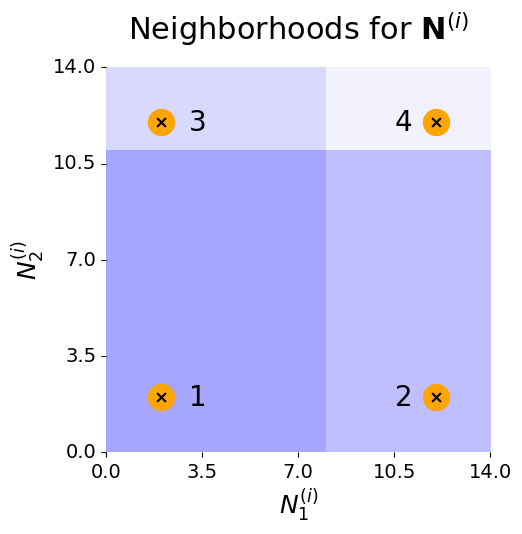

In [15]:
hos = 1
vos = 0.3
fig,ax = plt.subplots(figsize = (5,5))

sns.heatmap(basins2,cmap=cmap,cbar=False,square=True,ax=ax)
ax.set_xticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_xticklabels([f'{x:.1f}' for x in np.linspace(0,14,5)],fontsize=14)
ax.set_yticks(range(0,resolution,int(np.round((resolution-1)/4))))
ax.set_yticklabels([f'{x:.1f}' for x in np.linspace(14,0,5)],fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.set_title(f"Neighborhoods for $\mathbf{{N}}^{{(i)}}$",fontsize=22,pad=20)
ax.set_xlabel(f"$N_1^{{(i)}}$",fontsize=18)
ax.set_ylabel(f"$N_2^{{(i)}}$",fontsize=18)
ax.scatter(np.array(xs_balls)*(resolution-1)/14,(14-np.array(ys_balls))*(resolution-1)/14,marker='o',c='orange',s=350)
ax.scatter(np.array([2,2,12,12])*(resolution-1)/14,(14-np.array([2,12,2,12]))*(resolution-1)/14,marker='x',c='black',s=40)
ax.annotate(r'$1$',(2*(resolution-1)/14,(14-2)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$2$',(12*(resolution-1)/14,(14-2)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(2))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$3$',(2*(resolution-1)/14,(14-12)*(resolution-1)/14),((2+hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)
ax.annotate(r'$4$',(12*(resolution-1)/14,(14-12)*(resolution-1)/14),((12-1.5*hos)*(resolution-1)/14,(14+vos-(12))*(resolution-1)/14),fontsize=20)

plt.show()
#plt.savefig("Figures/Toy Model Basins with Balls.png",bbox_inches='tight')

# Two Host Example

With a network and a function governing local dynamics, we can create an instance of our NetDiff class.

In [16]:
def fun(t,y,a,b,c,d,e,f):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/10,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/10]

lam = np.array([[0.,1],[1,0]])

In [17]:
G = nx.from_numpy_array(lam)
net = NetDiff(G,fun)

In [18]:
gamma = 0.32
tspan = [0,1.5]
y0_list = [[2,2],[12,12]]

In [19]:
fixed_times = [[.1,.3,.4,.7,.73],[(0,1)]*5,tspan]

In [20]:
[ts_sim,ys_sim] = net.solve(tspan, y0_list, args_list=[[2,8,12,2,11,12]]*2,gamma=gamma,num_interactions=10,fixed=fixed_times)

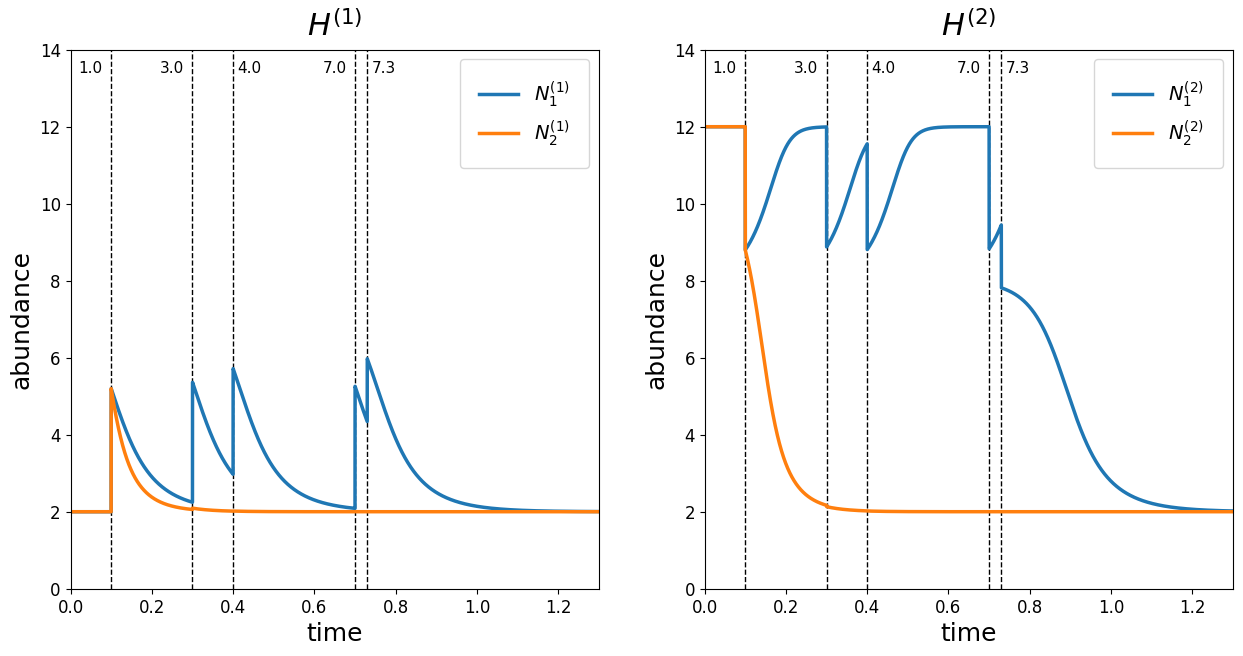

In [21]:
#fig, axs = plt.subplots(int(np.ceil(n_hosts/2)),2,figsize=(10,50))
fig, axs = plt.subplots(1,2,figsize=(15,7))

i=0
for ax in axs.flatten():
    #ax.set_prop_cycle(color=['red','orange','green','blue'])
    ax.vlines(fixed_times[0],0,14,color='black',linestyles='dashed',linewidth=1,label='_nolegend_')
    ax.plot(ts_sim, np.transpose(ys_sim[i,:,:]),linewidth=2.5)
    ax.annotate('1.0',(0.02,13.4),fontsize=11)
    ax.annotate('3.0',(.22,13.4),fontsize=11)
    ax.annotate('4.0',(.41,13.4),fontsize=11)
    ax.annotate('7.0',(.62,13.4),fontsize=11)
    ax.annotate('7.3',(.74,13.4),fontsize=11)
    ax.set_xlim([0,1.3])
    ax.set_ylim([0,14])
    ax.legend([f"$N_1^{{({i+1})}}$",f"$N_2^{{({i+1})}}$"], borderpad=1,fontsize=14)
    ax.set_title(f"$H^{{({i+1})}}$",fontsize=22,pad=10)
    ax.set_xlabel("time",fontsize=18)
    ax.set_ylabel("abundance",fontsize=18)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    i+=1

plt.show()
#plt.savefig("Figures/Two Hosts Abundance vs Time.png",bbox_inches='tight')

# Two Hosts HFLSA

In [22]:
def fun(t,y,a,b,c,d,e,f):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/10,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/10]

lam0 = np.array([[0.,1],[1,0]])

In [23]:
gammas = [0.01,0.001,0.0001]
tspan = [0,0.6]
y0_list = [[2,2],[12,12]]

In [24]:
G = nx.from_numpy_array(8*lam0/gammas[0])
net = NetDiff(G,fun)

In [25]:
[ts_app,ys_app] = net.solve_hils(tspan, y0_list, args_list=[[2,8,12,2,11,12]]*2,gamma=gammas[0])

In [26]:
#ys_sim = []

#for gamma in gammas:
#    G = nx.from_numpy_array(8.*lam0/gamma)
#    net = NetDiff(G,fun)
#    ys_sim.append(net.p_experiment_ys(tspan, y0_list, trials = 500, steps=1_000, args_list=[[2,8,12,2,11,12]]*2,gamma=gamma)[1])

#np.save('HFLSA_TwoHost_Sims.npy',np.array(ys_sim))

In [27]:
ys_sim = np.load('HFLSA_TwoHost_Sims.npy')

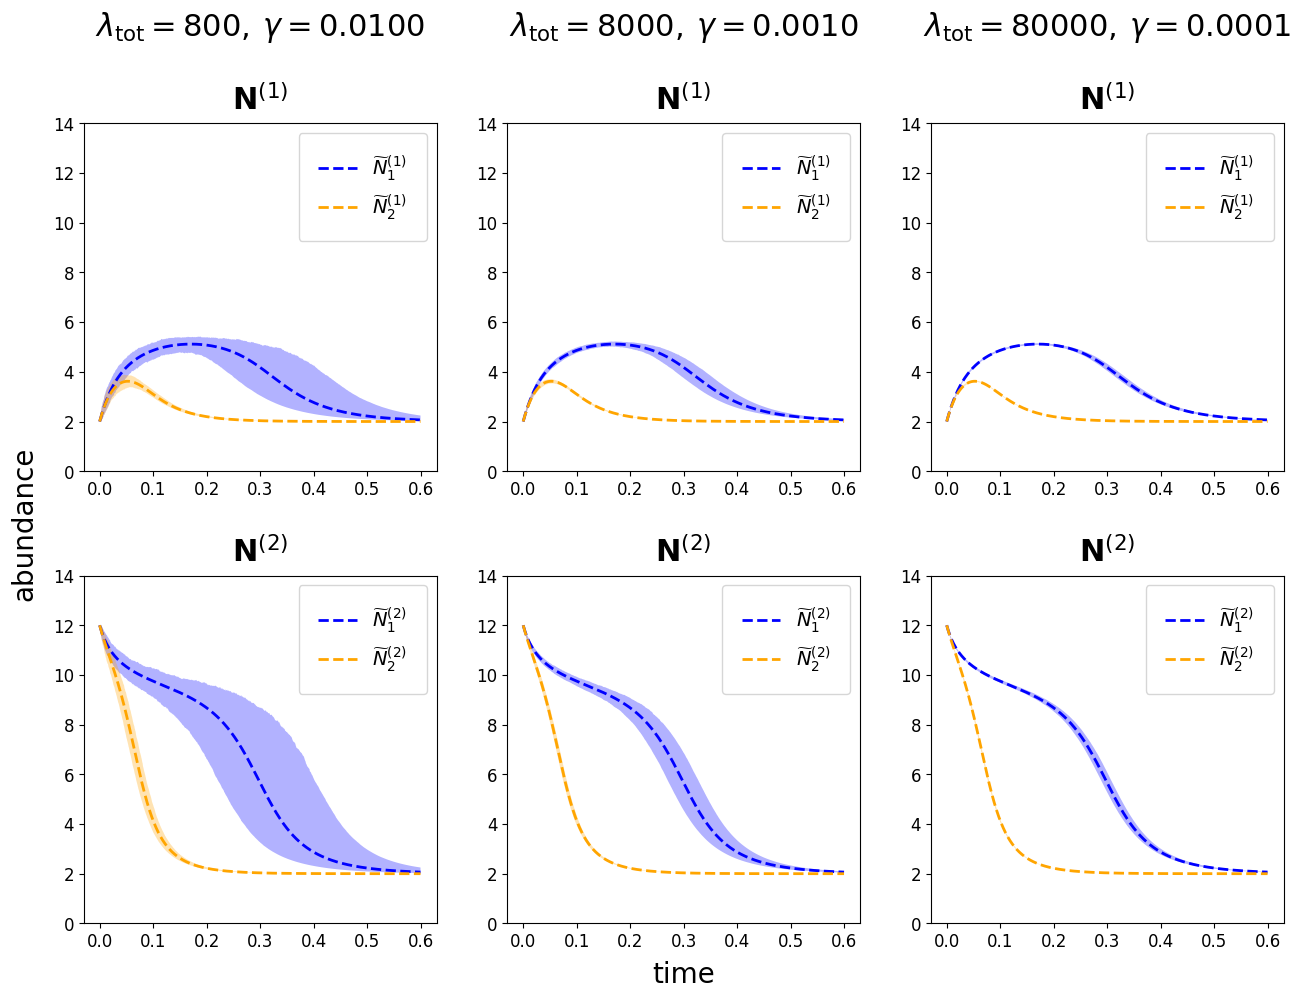

In [28]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

for i in range(len(gammas)):
    lam = 8./gammas[i]
    for j in range(2):
        ax = axs.flatten()[i+3*j]
        ax.set_prop_cycle(color=['blue','orange'])
        ax.plot(ts_app, ys_app[j,0],'--',linewidth=2)
        ax.plot(ts_app, ys_app[j,1],'--',linewidth=2)
        ax.fill_between(ts_app,np.percentile(ys_sim[i][:,j,0],5,axis=0),np.percentile(ys_sim[i][:,j,0],95,axis=0),alpha=0.3)
        ax.fill_between(ts_app,np.percentile(ys_sim[i][:,j,1],5,axis=0),np.percentile(ys_sim[i][:,j,1],95,axis=0),alpha=0.3)
        #ax.set_xlim([0,1])
        ax.set_ylim([0,14])
        ax.legend([f"$\widetilde{{N}}_1^{{({j+1})}}$",f"$\widetilde{{N}}_2^{{({j+1})}}$"],fontsize=14,borderpad=1)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        if j==0:
            ax.set_title(f"$\lambda_\mathrm{{tot}} = {lam:.0f},\: \gamma = {gammas[i]:.4f}$\n\n$\mathbf{{N}}^{{({j+1})}}$",fontsize=22,pad=10)
        else:
            ax.set_title(f"$\mathbf{{N}}^{{({j+1})}}$",fontsize=22,pad=10)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False) 
plt.xlabel("time",fontsize=20,labelpad=10)
plt.ylabel("abundance",fontsize=20,labelpad=10)

plt.show()
#plt.savefig("Figures/HFLSA Limit.png",bbox_inches='tight')

# Two Hosts HFCSA

In [29]:
def fun(t,y,a,b,c,d,e,f):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/10,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/10]

lam0 = np.array([[0.,1],[1,0]])

In [30]:
gamma = 0.06
lams = [300,600,1200]
tspan = [0,0.35]
y0_list = [[2,2],[12,12]]

In [31]:
G = nx.from_numpy_array(lams[0]*lam0)
net = NetDiff(G,fun)

In [32]:
[ts_app,ys_app] = net.solve(tspan, [[7,7],[7,7]], args_list=[[2,8,12,2,11,12]]*2,gamma=gamma,steps=1000)

In [33]:
#ys_sim = []

#for lam in lams:
#    G = nx.from_numpy_array(lam*lam0)
#    net = NetDiff(G,fun)
#    ys_sim.append(net.p_experiment_ys(tspan, y0_list, trials = 5, steps=1_000, args_list=[[2,8,12,2,11,12]]*2,gamma=gamma)[1])

#np.save('HFCSA_TwoHost_Sims.npy',np.array(ys_sim))

In [34]:
ys_sim = np.load('HFCSA_TwoHost_Sims.npy')

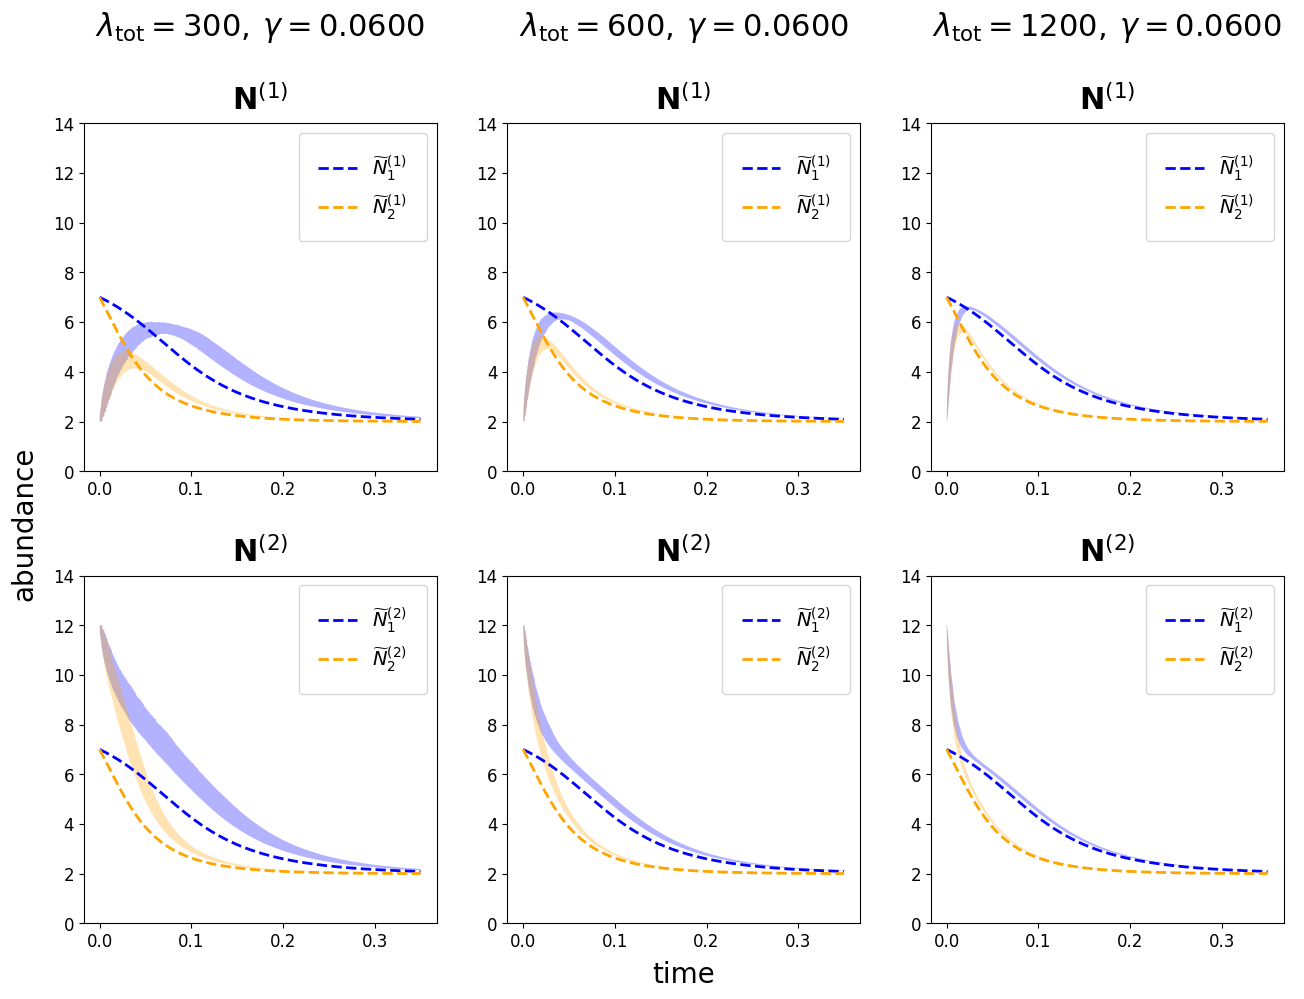

In [35]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.3)

for i in range(len(lams)):
    for j in range(2):
        ax = axs.flatten()[i+3*j]
        ax.set_prop_cycle(color=['blue','orange'])
        ax.plot(ts_app, ys_app[j,0],'--',linewidth=2)
        ax.plot(ts_app, ys_app[j,1],'--',linewidth=2)
        #ax.plot(ts_app, np.percentile(ys_sim[i][:,j,0],50,axis=0),linewidth=2)
        #ax.plot(ts_app, np.percentile(ys_sim[i][:,j,1],50,axis=0),linewidth=2)
        ax.fill_between(ts_app,np.percentile(ys_sim[i][:,j,0],5,axis=0),np.percentile(ys_sim[i][:,j,0],95,axis=0),alpha=0.3)
        ax.fill_between(ts_app,np.percentile(ys_sim[i][:,j,1],5,axis=0),np.percentile(ys_sim[i][:,j,1],95,axis=0),alpha=0.3)
        #ax.set_xlim([0,0.6])
        ax.set_ylim([0,14])
        ax.legend([f"$\widetilde{{N}}_1^{{({j+1})}}$",f"$\widetilde{{N}}_2^{{({j+1})}}$"],fontsize=14,borderpad=1)
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)
        if j==0:
            ax.set_title(f"$\lambda_\mathrm{{tot}} = {lams[i]:.0f},\: \gamma = {gamma:.4f}$\n\n$\mathbf{{N}}^{{({j+1})}}$",fontsize=22,pad=10)
        else:
            ax.set_title(f"$\mathbf{{N}}^{{({j+1})}}$",fontsize=22,pad=10)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False) 
plt.xlabel("time",fontsize=20,labelpad=10)
plt.ylabel("abundance",fontsize=20,labelpad=10)

plt.show()
#plt.savefig("Figures/HFCSA Limit.png",bbox_inches='tight')

# LFA Simulations

## Approximation

In [36]:
crits = np.load('crits.npy')
basins = np.load('basins.npy')
basins_range = [[0,14],[0,14]]
def fun(t,y,a,b,c,d,e,f,l):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/l,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/l]

In [ ]:
lam_og = 10*np.load("lam.npy",allow_pickle=True)

In [38]:
gammas = np.linspace(0.,0.5,61)
lam0s = np.logspace(3,-3,13)

gammas_valid = (gammas != 0.1)*(gammas != 0.4)
gammas = gammas[gammas_valid]

#exps = len(gammas)*len(lam0s) - len(gammas_done)*len(lam0s_done)
exps = len(gammas)*len(lam0s)

n_jobs = 48
n_hosts = len(lam_og)
num_basins = len(crits)

In [ ]:
def approx_LFA(gamma,lam0,lam_og,crits,basins,basins_range):
    
    n_hosts = len(lam_og)
    num_basins = len(crits)
    tspan = [0,2.]
    phi = inter_ops(crits,basins,basins_range,gamma)

    ys_sim = np.load(f"LFA_Simulations/LFA_sim_gamma{gamma:.4f}_lam{lam0:.4f}.npy",allow_pickle=True)
    s0 = get_s0(ys_sim[:,:,0])

    sol = pair_evolve(s0,lam_og,phi,tspan,steps=1_000)
    ts = sol.t
    ys = sol.y.reshape(n_hosts,n_hosts,num_basins,num_basins,ys_sim.shape[-1])
    singles = einsum('aakkt->akt',ys)    
    
    np.save(f"LFA_Simulations/LFA_app_gamma{gamma:.4f}_lam{lam0:.4f}.npy",singles)
    gc.collect()

In [ ]:
#Parallel(n_jobs=n_jobs,backend='loky',verbose=10)(delayed(approx_LFA)(gamma=gamma, lam0=lam0, lam_og=lam_og, crits=crits, basins=basins, basins_range=basins_range) 
#                                       for gamma in gammas
#                                       for lam0 in lam0s)

## Results

In [45]:
gammas = np.linspace(0.,0.5,61)
lam0s = np.logspace(3,-3,13)

gammas_valid = (gammas != 0.1)*(gammas != 0.4)
gammas = gammas[gammas_valid]

gammas2 = np.linspace(0.,0.5,61)

In [54]:
app0_diffs_arr = np.full((len(gammas),len(lam0s)),-1.)

for i in range(len(gammas)):
    
    gamma = gammas[i]
    
    for j in range(len(lam0s)):

        lam0 = lam0s[j]

        ys_sim = np.load(f"LFA_Simulations/LFA_sim_gamma{gamma:.4f}_lam{lam0:.4f}.npy",allow_pickle=True)
        try:
            ys_app = np.load(f"LFA_Simulations/LFA_app_gamma{gamma:.4f}_lam{lam0:.4f}.npy",allow_pickle=True)
        except:
            print(f"No file for gamma={gamma:.4f} and lam={lam0:.4f}")

        app0_diffs_arr[i,j] = 2*state_diff(ys_sim,ys_app)

app0_diffs_full = np.full((len(gammas2),len(lam0s)),-1.)
app0_diffs_full[:12,:] = app0_diffs_arr[:12,:]
app0_diffs_full[13:48,:] = app0_diffs_arr[12:47,:]
app0_diffs_full[49:,:] = app0_diffs_arr[47:,:]

app0_df = pd.DataFrame(app0_diffs_full.T,index=np.round(25*lam0s,3),columns=np.round(gammas2,3))

mask = np.full_like(app0_diffs_full,False)
mask[12,:] = True
mask[48,:] = True

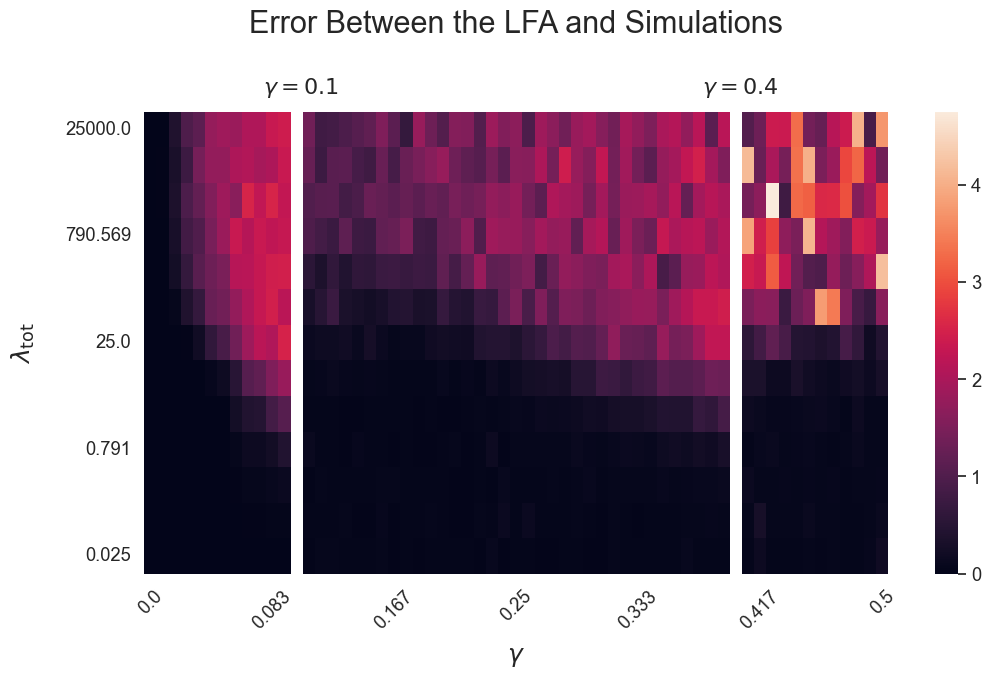

In [55]:
cmap = plt.get_cmap('rocket').copy()
cmap.set_bad(color='white')

sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,6))
hm = sns.heatmap(app0_df,ax=ax,xticklabels=10,yticklabels=3,mask=mask.T,vmin=0,cmap=cmap)
ax.set_xlabel("$\gamma$",fontsize=18,labelpad=10)
ax.set_ylabel("$\lambda_\mathrm{{tot}}$",fontsize=18,labelpad=20)
ax.annotate('$\gamma=0.1$', xy=(0.16, 1.04), xycoords='axes fraction', fontsize=16)
ax.annotate('$\gamma=0.4$', xy=(0.75, 1.04), xycoords='axes fraction', fontsize=16)
fig.suptitle("Error Between the LFA and Simulations",fontsize=22,x=0.435,y=1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
#plt.savefig("Figures/LFA Error.png",bbox_inches='tight')

In [ ]:
plt.style.use('default')
def plot_gamma_slice(gamma,lam0s,suptitle=None,filename=None):

    ts = np.linspace(0,2,1001)
    xticks = np.linspace(0, 2, 5)
    skip = 100
    
    fig, axs = plt.subplots(int(np.ceil(len(lam0s)/4)),4,figsize=(12,6))

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
    
    fig.suptitle(suptitle,fontsize=24,y=1.04)
    for i in range(len(lam0s)):
        ax = axs.flatten()[i]
        ax.set_prop_cycle(color=['red','orange','green','blue'])

        ys_sim = np.load(f"LFA_Simulations/LFA_sim_gamma{gamma:.4f}_lam{lam0s[i]:.4f}.npy",allow_pickle=True)
        ys_app = np.load(f"LFA_Simulations/LFA_app_gamma{gamma:.4f}_lam{lam0s[i]:.4f}.npy",allow_pickle=True)

        ax.plot(ts[::skip], np.transpose(np.mean(ys_sim[:,:,::skip],axis=0)),'x')
        ax.plot(ts, np.transpose(np.mean(ys_app,axis=0)),'--')
        ax.set_ylim([-0.05,1.05])
        ax.set_title(f"$\lambda_\mathrm{{tot}}$ = {25*lam0s[i]:.3f}".rstrip('0').rstrip('.'),fontsize=16)
        ax.set_xticks(xticks)

    ax.plot(ts[::skip], np.transpose(np.mean(ys_sim[:,:,::skip],axis=0))[:,0],'x',label="1")
    ax.plot(ts[::skip], np.transpose(np.mean(ys_sim[:,:,::skip],axis=0))[:,1],'x',label="2")
    ax.plot(ts[::skip], np.transpose(np.mean(ys_sim[:,:,::skip],axis=0))[:,2],'x',label="3")
    ax.plot(ts[::skip], np.transpose(np.mean(ys_sim[:,:,::skip],axis=0))[:,3],'x',label="4")
    ax.plot(ts, np.transpose(np.mean(ys_app,axis=0)),'--')
    
    fig.legend(bbox_to_anchor=(1.07,0.7),fontsize=20)


    for k in range(i+1,len(axs.flatten())):
        axs.flatten()[k].axis("off")

    fig.text(0.5, -0.02, "frequency-scaled time", ha='center', fontsize=20)
    fig.text(0.02, 0.5, f"mean of  $\psi^{{(i)}}$", va='center', rotation='vertical', fontsize=20)
    
    if filename is not None:
        plt.savefig(filename,bbox_inches='tight')
    else:
        plt.show()

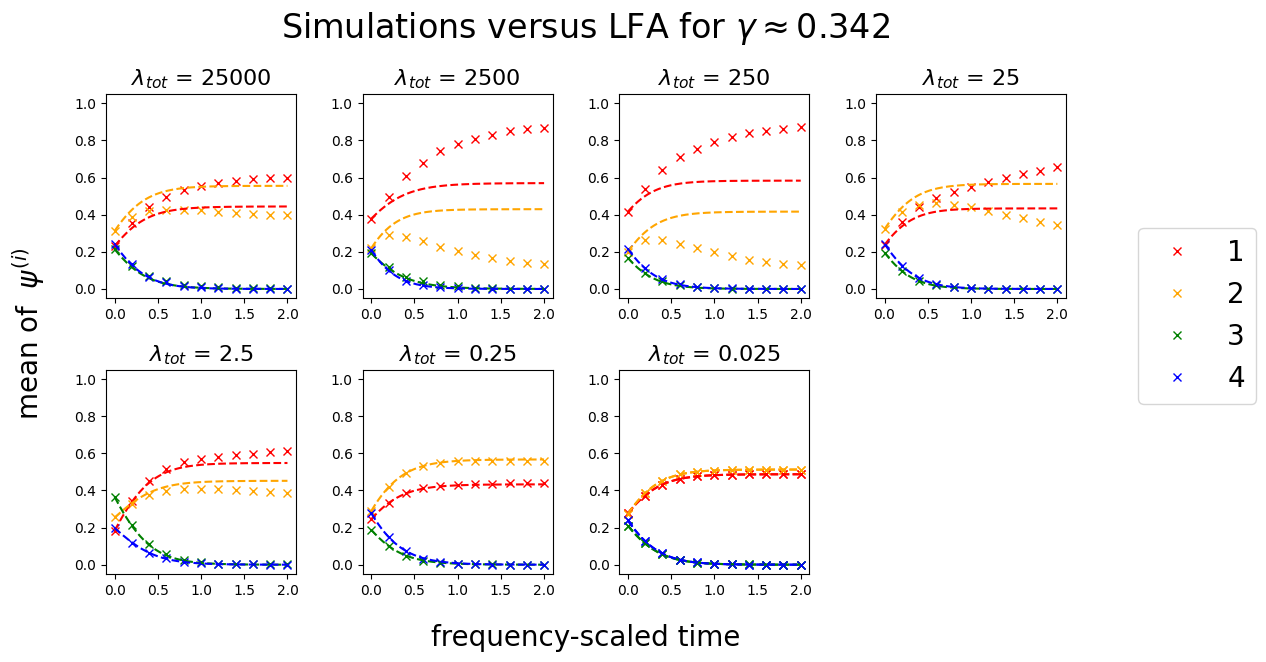

In [78]:
plot_gamma_slice(gammas[40],lam0s[::2],suptitle=f"Simulations versus LFA for $\\gamma\\approx{gammas[40]:.3f}$")
#plot_gamma_slice(gammas[40],lam0s[::2],suptitle=f"Simulations versus LFA for $\\gamma\\approx{gammas[40]:.3f}$",
#                 filename=f"Figures/Gamma Slice Plot {gammas[40]:.3f}.png")

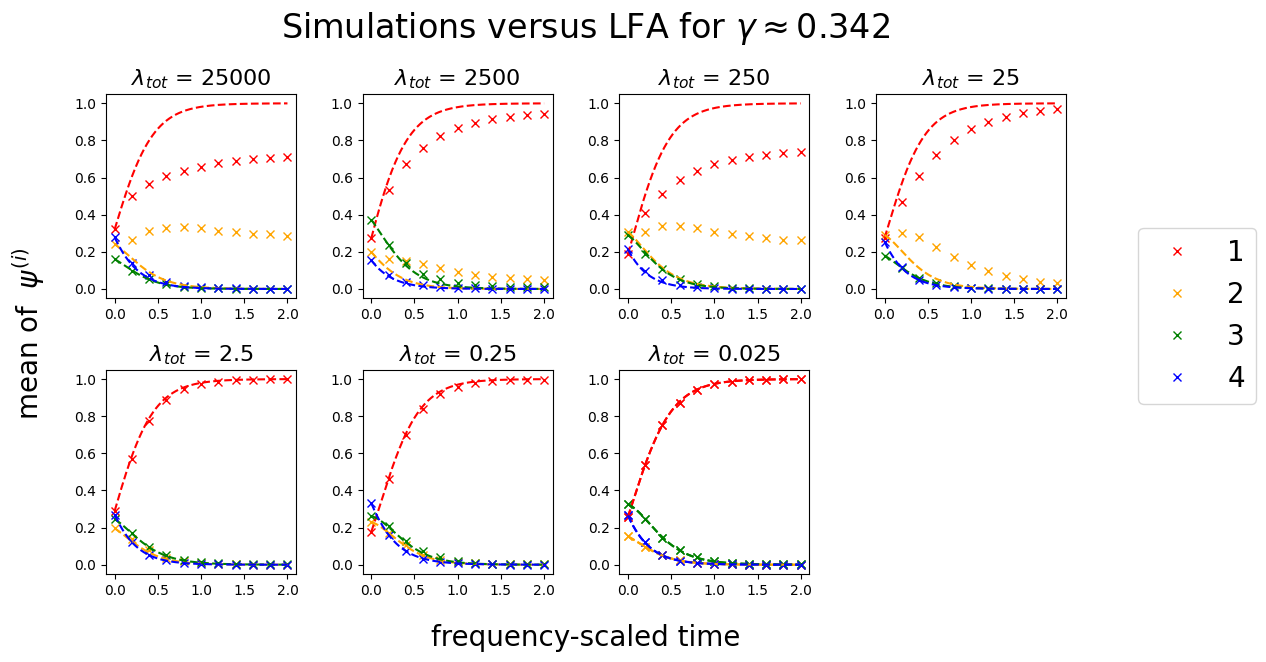

In [79]:
plot_gamma_slice(gammas[50],lam0s[::2],suptitle=f"Simulations versus LFA for $\\gamma\\approx{gammas[40]:.3f}$")
#plot_gamma_slice(gammas[50],lam0s[::2],suptitle=f"Simulations versus LFA for $\\gamma\\approx{gammas[40]:.3f}$",
#                 filename=f"Figures/Gamma Slice Plot {gammas[50]:.3f}.png")

# HFLSA Simulations

## Approximation

In [57]:
y0_list = np.load("y0_list.npy")
lam_gammas = np.linspace(.04,3.,75)
lam0s = np.logspace(3,1.,13)

lam_og = 10*np.load("lam.npy",allow_pickle=True)
n_jobs = 48
n_hosts = len(lam_og)
steps = 100

def fun(t,y,a,b,c,d,e,f,l):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/l,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/l]

In [ ]:
def approx_HFLSA(lg,lam0,lam_og,y0_list):
    
    gamma = lg / lam0
        
    G = nx.from_numpy_array(lam0*lam_og)
    net = NetDiff(G,fun)

    [ts_app,ys_app] = net.solve_hils(tspan, y0_list, args_list=[[2,8,12,2,11,12,10.]]*n_hosts,gamma=gamma,steps=steps)
    
    np.save(f"HFLSA_Simulations2/HFLSA_app_gamma{gamma:.4f}_lam{lam0:.4f}.npy",ys_app)
    
    gc.collect()

In [62]:
Parallel(n_jobs=n_jobs,backend='loky',verbose=10)(delayed(approx_HFLSA)(lg=lg, lam0=lam0, lam_og=lam_og, y0_list=y0_list) 
                                       for lg in lam_gammas
                                       for lam0 in lam0s)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:   17.8s
[Parallel(n_jobs=48)]: Done  16 tasks      | elapsed:  

NameError: name 'singles' is not defined

## Results

In [40]:
lam_gammas = np.linspace(.04,3.,75)
lam0s = np.logspace(3,1.,13)

app1_diffs_arr = np.full((len(lam_gammas),len(lam0s)),-1.)

for i in range(len(lam_gammas)):
    
    for j in range(len(lam0s)):

        lam0 = lam0s[j]
        gamma = lam_gammas[i]/lam0

        ys_sim = np.load(f"HFLSA_simulations/HFLSA_sim_gamma{gamma:.8f}_lam{lam0:.8f}.npy",allow_pickle=True)
        try:
            ys_app = np.load(f"HFLSA_simulations/HFLSA_app_gamma{gamma:.8f}_lam{lam0:.8f}.npy",allow_pickle=True)
        except:
            print(f"No file for gamma={gamma:.8f} and lam={lam0:.8f}")

        app1_diffs_arr[i,j] = np.average([state_diff(ys_sim[k],ys_app) for k in range(len(ys_sim))])

app1_df = pd.DataFrame(app1_diffs_arr.T,index=25*lam0s.astype(int),columns=np.round(lam_gammas,3))

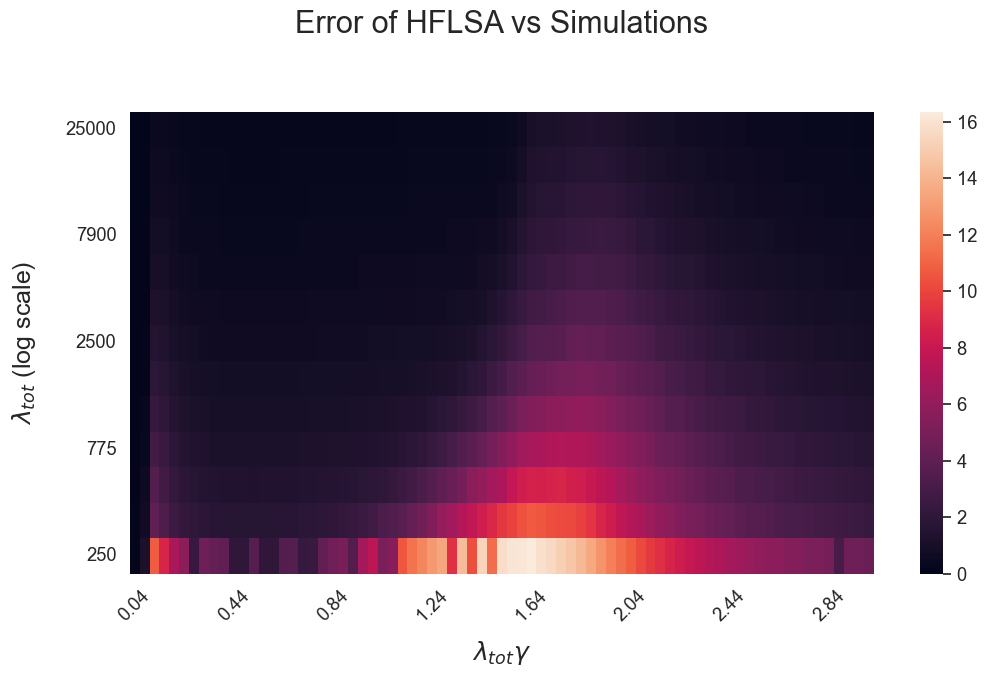

In [41]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,6))
hm = sns.heatmap(app1_df,ax=ax,xticklabels=10,yticklabels=3,vmin=0)
ax.set_xlabel("$\lambda_{{tot}}\gamma$",fontsize=18,labelpad=10)
ax.set_ylabel("$\lambda_{{tot}}$ (log scale)",fontsize=18,labelpad=20)
fig.suptitle("Error of HFLSA vs Simulations",fontsize=22,x=0.435,y=1.05)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
#plt.savefig("Figures/HFLSA Error.png",bbox_inches='tight')
plt.show()

# HFCSA Simulations

In [76]:
lam_og = 10*np.load("lam.npy",allow_pickle=True)

def fun(t,y,a,b,c,d,e,f):
    return [-y[0]*(y[0]-a)*(y[0]-b)*(y[0]-c)/10,-y[1]*(y[1]-d)*(y[1]-e)*(y[1]-f)/10]

gammas = np.linspace(0.,0.5,61)[1:]
lam0s = np.logspace(3.,-2,21)

steps = 100

exps = len(lam0s)*len(gammas)

exp_count = 0

n_jobs = 48
tspan = [0,1.]
n_hosts = len(lam_og)
ts = np.linspace(tspan[0],tspan[1],steps+1)

y0_list = np.load('y0_list.npy')

G = nx.from_numpy_array(lams[0]*lam_og)
net = NetDiff(G,fun)

In [83]:
[ts_app,ys_app] = net.solve(tspan, np.full(y0_list.shape,np.mean(y0_list,axis=0)), args_list=[[2,8,12,2,11,12]]*n_hosts,gamma=gamma,steps=steps)

In [84]:
app1_diffs_arr = np.full((len(gammas),len(lam0s)),-1.)

for i in range(len(gammas)):
    
    for j in range(len(lam0s)):

        lam0 = lam0s[j]
        gamma = gammas[i]

        ys_sim = np.load(f"HFCSA_Simulations/HFCSA_sim_gamma{gamma:.8f}_lam{lam0:.8f}.npy",allow_pickle=True)

        app1_diffs_arr[i,j] = np.average([state_diff(ys_sim[k],ys_app) for k in range(len(ys_sim))])

app1_df = pd.DataFrame(app1_diffs_arr.T,index=np.round(25*lam0s,0),columns=np.round(gammas,3))

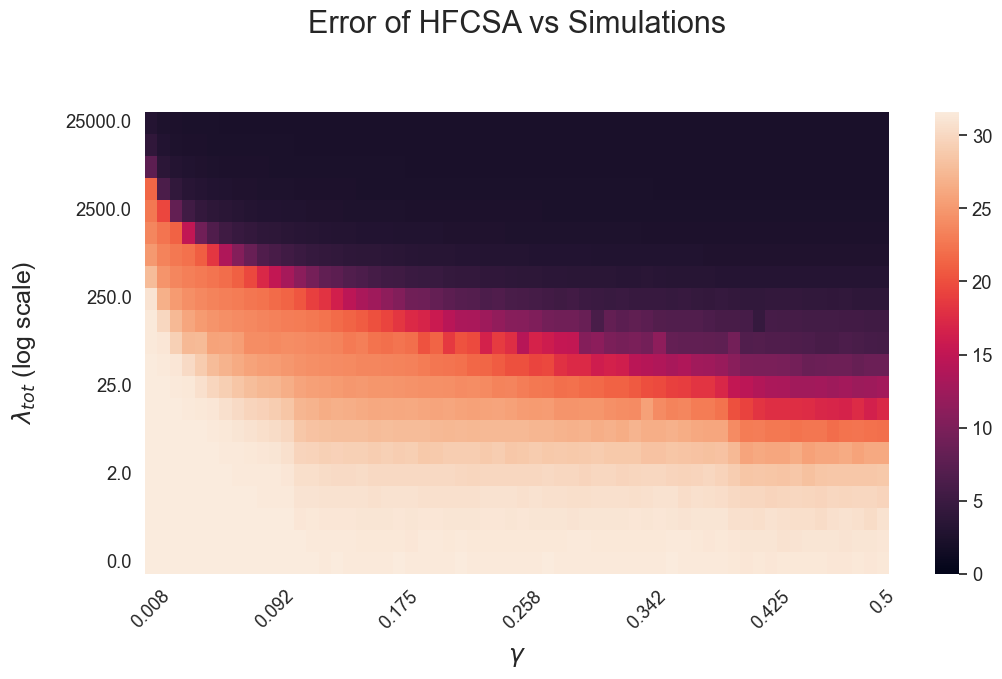

In [85]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,6))
hm = sns.heatmap(app1_df,ax=ax,xticklabels=10,yticklabels=4,vmin=0)
ax.set_xlabel("$\gamma$",fontsize=18,labelpad=10)
ax.set_ylabel("$\lambda_{{tot}}$ (log scale)",fontsize=18,labelpad=20)
fig.suptitle("Error of HFCSA vs Simulations",fontsize=22,x=0.435,y=1.05)
xticks = ax.get_xticks()
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
xticks = np.append(xticks, xticks[-1] + (xticks[1] - xticks[0])-1) #calculates the spacing between ticks and adds it to the last tick
xticklabels.append(str(np.round(gammas[-1],3))) #adds 1 to the last tick label
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("Figures/HFCSA Error.png",bbox_inches='tight')